# Sobre o notebook

Aproveite esse espaço para as atividades do curso de Data Visualization: gráficos de composição e relacionamento da Alura. Aqui você pode escrever e testar os códigos dos diversos desafios envolvendo os aprendizados de cada aula.

Este notebook foi construído com espaço para as células dos desafios propostos no curso, com ele você tem espaço para construir e executar suas soluções


## Paleta de Cores

Vamos compartilhar aqui a paleta de cores que usamos durante o curso pra você executar e usar em seu projeto, mas sinta-se livre para construir a sua propria.

In [125]:
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5, AZUL6 = '#174A7E', '#4A81BF', "#6495ED", '#2596BE', '#94AFC5', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5, CINZA6, BRANCO = '#231F20', '#414040', '#555655', '#A6A6A5', '#BFBEBE', '#DEE2E6', '#FFFFFF'
VERMELHO1, VERMELHO2, LARANJA1 = '#C3514E',	'#E6BAB7',	'#F79747'
VERDE1, VERDE2, VERDE3 = '#0C8040',	'#9ABB59', '#9ECCB3'

## Aula 01 - Proporção dos dados

### Desafio 1

Neste desafio, a missão é construir as visualizações que respondam aos seguintes questionamentos:

Desafio 1

Como estão dispostos os valores agregados de serviços por região do Brasil no ano de 2018?

In [126]:
import pandas as pd

In [127]:
pib = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/dataviz-graficos-composicao-relacionamento/main/dados/pib_br_2002_2020_estados.csv')
pib

,ano,sigla_uf,regiao,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
0,2002,RO,Norte,7467629886,839731192,6627898698,715526872,1191090432,2484579193,2236702207
1,2003,RO,Norte,9425010486,1108434936,8316575548,1278658831,1216605061,3376727040,2444584625
2,2004,RO,Norte,11004641436,1288806654,9715834778,1288515348,1674933817,3986529419,2765856199
3,2005,RO,Norte,12511821181,1476144194,11035676990,1342222120,1887932121,4603783904,3201738843
4,2006,RO,Norte,13054713344,1613809974,11440903374,1238006193,2210692147,4320526746,3671678293
...,...,...,...,...,...,...,...,...,...,...
508,2016,DF,Centro-Oeste,235540044811,29145619376,206394425435,820754661,9662357225,103859865830,92051447720
509,2017,DF,Centro-Oeste,244722249337,29120461647,215601787690,828313642,8448768236,108322119432,98002586380
510,2018,DF,Centro-Oeste,254817204692,28692287369,226124917323,1022690641,9541298290,113768086938,101792841454
511,2019,DF,Centro-Oeste,273613711477,30686607647,242927103829,992393584,9453608031,125261853488,107219248727


In [128]:
pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ano                513 non-null    int64 
 1   sigla_uf           513 non-null    object
 2   regiao             513 non-null    object
 3   pib                513 non-null    int64 
 4   impostos_liquidos  513 non-null    int64 
 5   va                 513 non-null    int64 
 6   va_agropecuaria    513 non-null    int64 
 7   va_industria       513 non-null    int64 
 8   va_servicos        513 non-null    int64 
 9   va_adespss         513 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 40.2+ KB


In [129]:
pib2018 = pib.copy()
pib2018 = pib.query('ano ==2018')[['pib', 'va_servicos', 'regiao']]
pib2018['%ser'] = round(pib2018.va_servicos/(pib2018.va_servicos.sum()) * 100,1)
pib2018 = pib2018.groupby('regiao').sum()

pib2018

,pib,va_servicos,%ser
regiao,,,
Centro-Oeste,694910923213,296250896281,8.9
Nordeste,1004827439619,433449662991,13.0
Norte,387535315655,133394247965,4.0
Sudeste,3721316870999,1933221862566,57.8
Sul,1195550450502,546627330178,16.4


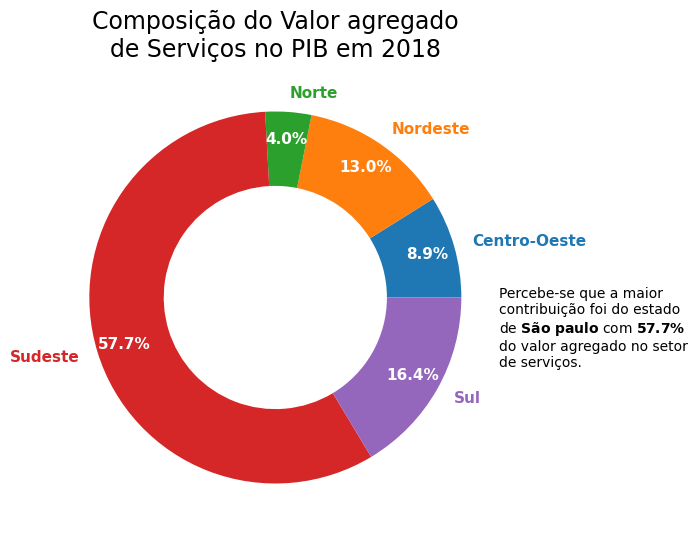

In [130]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,8))
ax.set_title('Composição do Valor agregado\nde Serviços no PIB em 2018', fontsize = 17)
ptc, text, _ = ax.pie(data= pib2018, x = '%ser', labels = pib2018.index, autopct = '%.1f%%', pctdistance = 0.85,
                      textprops = {"size":11, "fontweight":'bold', 'color':'white'}, wedgeprops = dict(width = 0.4))

for i, p in enumerate(ptc):
  text[i].set_color(p.get_facecolor())

ax.text(0.98,0.35, 'Percebe-se que a maior\ncontribuição foi do estado\nde $\\bf{São\ paulo}$ com $\\bf57.7\%$\ndo valor agregado no setor\nde serviços.',
        transform = ax.transAxes);

### Desafio 2

Desafio 2

Qual a participação da Região Norte nos valores agregados da indústria de todo Brasil nos anos de 2010 e 2020? Podemos notar algum comportamento?

In [131]:
pib_norte = pib.copy()

pib_2010 = pib_norte.query('ano == 2010')[['regiao', 'va_industria']]
pib_2020 = pib_norte.query('ano == 2020')[['regiao', 'va_industria']]

pib_2010 = pib_2010.groupby('regiao').sum()
pib_2020 = pib_2020.groupby('regiao').sum()

pib_2010.loc[pib_2010.index != 'Norte', 'est'] = "Outros Estados"
pib_2010.loc[pib_2010.index == 'Norte', 'est'] = 'Norte'
pib_2010 = pib_2010.groupby('est').sum()

pib_2020.loc[pib_2020.index != 'Norte', 'est'] = "Outros Estados"
pib_2020.loc[pib_2020.index == 'Norte', 'est'] = 'Norte'
pib_2020 = pib_2020.groupby('est').sum()

display(pib_2010, pib_2020)



,va_industria
est,
Norte,58665438171
Outros Estados,845492561850


,va_industria
est,
Norte,137740478879
Outros Estados,1346596521109


Text(1, 174, '')

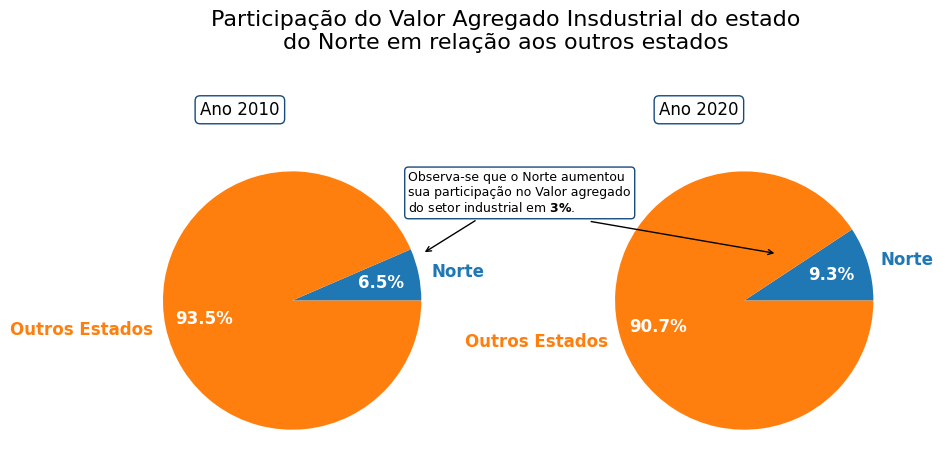

In [188]:
fig, axs  = plt.subplots(1, 2, figsize = (10,6))
fig.subplots_adjust(wspace=0.4)

fig.suptitle('Participação do Valor Agregado Insdustrial do estado\ndo Norte em relação aos outros estados', size = 16)

ptc, text, _ = axs[0].pie(data = pib_2010, x = 'va_industria', labels = pib_2010.index, autopct = '%.1f%%',
                          textprops= {'size': 12, 'fontweight': 'bold', 'color': 'white'}, pctdistance = 0.7)

axs[0].annotate('Ano 2010', xy= (50,250), xycoords = 'axes points', size = 12,
                bbox = {'boxstyle': 'round', 'fc': 'white', 'ec':AZUL1} )

for i, p in enumerate(ptc):
  text[i].set_color(p.get_facecolor())


ptc, text, _ = axs[1].pie(data = pib_2020, x = 'va_industria', labels = pib_2020.index, autopct = '%.1f%%',
                          textprops= {'size': 12, 'fontweight': 'bold', 'color': 'white'}, pctdistance = 0.7)
axs[1].annotate('Ano 2020', xy= (55,250), xycoords = 'axes points', size = 12,
                bbox = {'boxstyle': 'round', 'fc': 'white', 'ec':AZUL1} )

for i, p in enumerate(ptc):
  text[i].set_color(p.get_facecolor())


axs[0].annotate('Observa-se que o Norte aumentou\nsua participação no Valor agregado\ndo setor industrial em $\\bf3\%$.', xy=(210,150),
                xycoords = 'axes points', size = 9, bbox= {'boxstyle':'round', 'fc': 'white', 'ec':AZUL1}, arrowprops = {'arrowstyle':'->'},
                xytext= (200,180), textcoords= 'axes points')
axs[1].annotate('', xy=(140,150), xycoords = 'axes points', size = 9,
                bbox= {'boxstyle':'round', 'fc': 'white', 'ec':AZUL1}, arrowprops = {'arrowstyle':'->'},
                xytext= (1,174), textcoords= 'axes points')

## Aula 02 - Compondo dados estáticos

### Desafio 1

### Desafio 2

## Aula 03 - Compondo dados dinâmicos

### Desafio 1

### Desafio 2

## Aula 04 - Investigando a variação dos dados

### Desafio 1

### Desafio 2

## Aula 05 - Relacionando dados

### Desafio 1

### Desafio 2